# EfficientNet Implementation   - EfficientNet- B0

## Training a Custom  Model from scratch

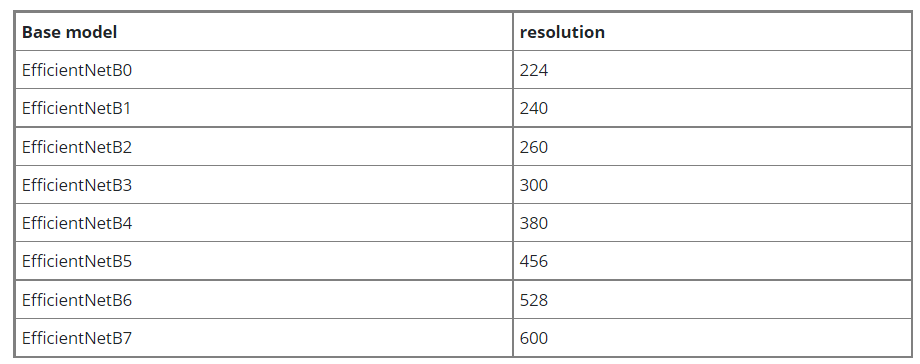

# Data Pre Processing

In [1]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('dataset')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['foot-ulcers', 'leg-ulcer-images-venous-ulcer', 'pressure-ulcers-combine']
Types of classes labels found:  3


In [2]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('dataset' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [3]:

# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

        Labels                                              image
0  foot-ulcers    dataset_path/foot-ulcers/180-foot-ulcer (1).jpg
1  foot-ulcers   dataset_path/foot-ulcers/180-foot-ulcer (10).jpg
2  foot-ulcers  dataset_path/foot-ulcers/180-foot-ulcer (100).jpg
3  foot-ulcers  dataset_path/foot-ulcers/180-foot-ulcer (101).jpg
4  foot-ulcers  dataset_path/foot-ulcers/180-foot-ulcer (102).jpg
                       Labels  \
4015  pressure-ulcers-combine   
4016  pressure-ulcers-combine   
4017  pressure-ulcers-combine   
4018  pressure-ulcers-combine   
4019  pressure-ulcers-combine   

                                                  image  
4015  dataset_path/pressure-ulcers-combine/undermini...  
4016  dataset_path/pressure-ulcers-combine/undermini...  
4017  dataset_path/pressure-ulcers-combine/undermini...  
4018  dataset_path/pressure-ulcers-combine/undermini...  
4019  dataset_path/pressure-ulcers-combine/undermini...  


In [4]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  4020
pressure-ulcers-combine          1749
leg-ulcer-images-venous-ulcer    1171
foot-ulcers                      1100
Name: Labels, dtype: int64


In [5]:
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [6]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(4020, 224, 224, 3)

In [7]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['foot-ulcers' 'foot-ulcers' 'foot-ulcers' ... 'pressure-ulcers-combine'
 'pressure-ulcers-combine' 'pressure-ulcers-combine']
[0 0 0 ... 2 2 2]


In [8]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(3216, 224, 224, 3)
(3216, 3)
(804, 224, 224, 3)
(804, 3)



# EfficientNet Implementation :



In [37]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [34]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )


In [42]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
# Create an instance of the EfficientNetB0 model
#model = EfficientNetB0(weights='imagenet', include_top=True)

# Display the summary of the model architecture
print(model.summary())

# Print the summary of the model to see the layers and their parameters
#model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 224, 224, 3)          0         ['input_8[0][0]']             
                                                                                                  
 normalization_3 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_4[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_5 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_3

 y)                                                                  'block2a_se_expand[0][0]']   
                                                                                                  
 block2a_project_conv (Conv  (None, 56, 56, 24)           2304      ['block2a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block2a_project_bn (BatchN  (None, 56, 56, 24)           96        ['block2a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block2b_expand_conv (Conv2  (None, 56, 56, 144)          3456      ['block2a_project_bn[0][0]']  
 D)                                                                                               
          

                                                                                                  
 block3a_project_conv (Conv  (None, 28, 28, 40)           5760      ['block3a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block3a_project_bn (BatchN  (None, 28, 28, 40)           160       ['block3a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block3b_expand_conv (Conv2  (None, 28, 28, 240)          9600      ['block3a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block3b_e

 block4a_project_conv (Conv  (None, 14, 14, 80)           19200     ['block4a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block4a_project_bn (BatchN  (None, 14, 14, 80)           320       ['block4a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block4b_expand_conv (Conv2  (None, 14, 14, 480)          38400     ['block4a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block4b_expand_bn (BatchNo  (None, 14, 14, 480)          1920      ['block4b_expand_conv[0][0]'] 
 rmalizati

 ormalization)                                                                                    
                                                                                                  
 block4c_drop (Dropout)      (None, 14, 14, 80)           0         ['block4c_project_bn[0][0]']  
                                                                                                  
 block4c_add (Add)           (None, 14, 14, 80)           0         ['block4c_drop[0][0]',        
                                                                     'block4b_add[0][0]']         
                                                                                                  
 block5a_expand_conv (Conv2  (None, 14, 14, 480)          38400     ['block4c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5a_e

 block5b_add (Add)           (None, 14, 14, 112)          0         ['block5b_drop[0][0]',        
                                                                     'block5a_project_bn[0][0]']  
                                                                                                  
 block5c_expand_conv (Conv2  (None, 14, 14, 672)          75264     ['block5b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5c_expand_bn (BatchNo  (None, 14, 14, 672)          2688      ['block5c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5c_expand_activation   (None, 14, 14, 672)          0         ['block5c_expand_bn[0][0]']   
 (Activati

 ormalization)                                                                                    
                                                                                                  
 block6b_expand_conv (Conv2  (None, 7, 7, 1152)           221184    ['block6a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block6b_expand_bn (BatchNo  (None, 7, 7, 1152)           4608      ['block6b_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6b_expand_activation   (None, 7, 7, 1152)           0         ['block6b_expand_bn[0][0]']   
 (Activation)                                                                                     
          

 block6c_add (Add)           (None, 7, 7, 192)            0         ['block6c_drop[0][0]',        
                                                                     'block6b_add[0][0]']         
                                                                                                  
 block6d_expand_conv (Conv2  (None, 7, 7, 1152)           221184    ['block6c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6d_expand_bn (BatchNo  (None, 7, 7, 1152)           4608      ['block6d_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6d_expand_activation   (None, 7, 7, 1152)           0         ['block6d_expand_bn[0][0]']   
 (Activati

                                                                                                  
 top_bn (BatchNormalization  (None, 7, 7, 1280)           5120      ['top_conv[0][0]']            
 )                                                                                                
                                                                                                  
 top_activation (Activation  (None, 7, 7, 1280)           0         ['top_bn[0][0]']              
 )                                                                                                
                                                                                                  
 avg_pool (GlobalAveragePoo  (None, 1280)                 0         ['top_activation[0][0]']      
 ling2D)                                                                                          
                                                                                                  
 top_dropo

In [11]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

hist = model.fit(train_x, train_y, epochs=30, verbose=2)


Epoch 1/30
101/101 - 991s - loss: 2.8471 - accuracy: 0.4244 - 991s/epoch - 10s/step
Epoch 2/30
101/101 - 931s - loss: 1.3184 - accuracy: 0.5774 - 931s/epoch - 9s/step
Epoch 3/30
101/101 - 916s - loss: 0.9952 - accuracy: 0.7195 - 916s/epoch - 9s/step
Epoch 4/30
101/101 - 917s - loss: 0.7443 - accuracy: 0.7811 - 917s/epoch - 9s/step
Epoch 5/30
101/101 - 916s - loss: 0.6226 - accuracy: 0.8321 - 916s/epoch - 9s/step
Epoch 6/30
101/101 - 921s - loss: 0.5548 - accuracy: 0.8685 - 921s/epoch - 9s/step
Epoch 7/30
101/101 - 918s - loss: 0.3945 - accuracy: 0.8993 - 918s/epoch - 9s/step
Epoch 8/30
101/101 - 920s - loss: 0.3285 - accuracy: 0.9179 - 920s/epoch - 9s/step
Epoch 9/30
101/101 - 921s - loss: 0.2701 - accuracy: 0.9313 - 921s/epoch - 9s/step
Epoch 10/30
101/101 - 922s - loss: 0.3038 - accuracy: 0.9275 - 922s/epoch - 9s/step
Epoch 11/30
101/101 - 912s - loss: 0.2941 - accuracy: 0.9266 - 912s/epoch - 9s/step
Epoch 12/30
101/101 - 914s - loss: 0.2314 - accuracy: 0.9353 - 914s/epoch - 9s/step


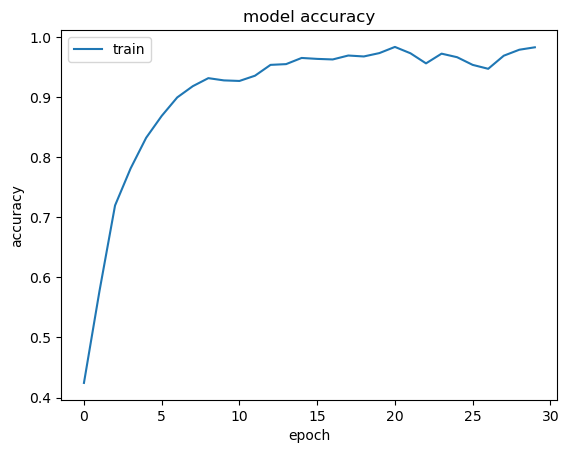

In [20]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [24]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

26/26 [==============================] - 60s 2s/step - loss: 1.2865 - accuracy: 0.7923
Loss = 1.2864913940429688
Test Accuracy = 0.7922885417938232


# Testing Efficient Model On Unseen data

Input image shape: (1, 224, 224, 3)


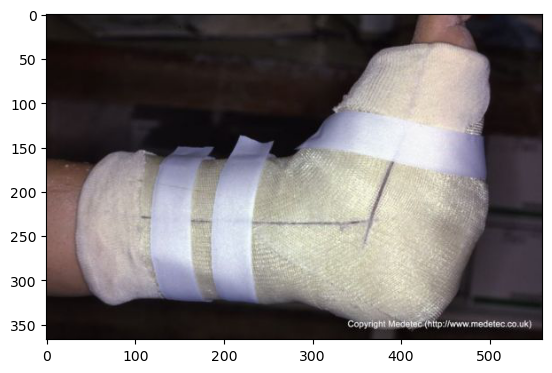

In [25]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = 'unseen_imagenet.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [26]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

1/1 [==============================] - 2s 2s/step


array([[0., 1., 0.]], dtype=float32)

In [27]:

# Cuda and cudnn is installed for this tensorflow version. So we can see GPU is enabled
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [28]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    cpu_performance

Epoch 1/30
101/101 - 1041s - loss: 0.1505 - accuracy: 0.9574 - 1041s/epoch - 10s/step
Epoch 2/30
101/101 - 922s - loss: 0.1280 - accuracy: 0.9649 - 922s/epoch - 9s/step
Epoch 3/30
101/101 - 919s - loss: 0.1371 - accuracy: 0.9558 - 919s/epoch - 9s/step
Epoch 4/30
101/101 - 920s - loss: 0.1235 - accuracy: 0.9630 - 920s/epoch - 9s/step
Epoch 5/30
101/101 - 917s - loss: 0.0506 - accuracy: 0.9804 - 917s/epoch - 9s/step
Epoch 6/30
101/101 - 921s - loss: 0.0372 - accuracy: 0.9866 - 921s/epoch - 9s/step
Epoch 7/30
101/101 - 923s - loss: 0.0813 - accuracy: 0.9782 - 923s/epoch - 9s/step
Epoch 8/30
101/101 - 921s - loss: 0.1022 - accuracy: 0.9708 - 921s/epoch - 9s/step
Epoch 9/30
101/101 - 924s - loss: 0.0895 - accuracy: 0.9776 - 924s/epoch - 9s/step
Epoch 10/30
101/101 - 922s - loss: 0.0450 - accuracy: 0.9832 - 922s/epoch - 9s/step
Epoch 11/30
101/101 - 921s - loss: 0.0813 - accuracy: 0.9751 - 921s/epoch - 9s/step
Epoch 12/30
101/101 - 921s - loss: 0.0334 - accuracy: 0.9869 - 921s/epoch - 9s/ste

In [29]:

%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    gpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    gpu_performance

Epoch 1/30
101/101 - 929s - loss: 0.0439 - accuracy: 0.9863 - 929s/epoch - 9s/step
Epoch 2/30
101/101 - 919s - loss: 0.0284 - accuracy: 0.9894 - 919s/epoch - 9s/step
Epoch 3/30
101/101 - 920s - loss: 0.0138 - accuracy: 0.9956 - 920s/epoch - 9s/step
Epoch 4/30
101/101 - 917s - loss: 0.0269 - accuracy: 0.9894 - 917s/epoch - 9s/step
Epoch 5/30
101/101 - 920s - loss: 0.0160 - accuracy: 0.9956 - 920s/epoch - 9s/step
Epoch 6/30
101/101 - 916s - loss: 0.0306 - accuracy: 0.9928 - 916s/epoch - 9s/step
Epoch 7/30
101/101 - 918s - loss: 0.1486 - accuracy: 0.9552 - 918s/epoch - 9s/step
Epoch 8/30
101/101 - 919s - loss: 0.0389 - accuracy: 0.9866 - 919s/epoch - 9s/step
Epoch 9/30
101/101 - 920s - loss: 0.0132 - accuracy: 0.9956 - 920s/epoch - 9s/step
Epoch 10/30
101/101 - 917s - loss: 0.0163 - accuracy: 0.9928 - 917s/epoch - 9s/step
Epoch 11/30
101/101 - 916s - loss: 0.0240 - accuracy: 0.9941 - 916s/epoch - 9s/step
Epoch 12/30
101/101 - 916s - loss: 0.0250 - accuracy: 0.9916 - 916s/epoch - 9s/step
E

In [ ]:
# CPU completed the training in 7 min 53 Seconds and GPU did that training in 25.6 seconds